In [16]:
import pandas as pd 
from sklearn import svm, metrics, tree, ensemble
from sklearn.model_selection import  train_test_split 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [2]:
corr_csv = pd.read_csv("corr_0828.csv")
corr_df = pd.DataFrame(corr_csv).drop(['Unnamed: 0'], axis=1)

In [3]:
corr_df.columns = ['X','cen_Y','res_Y','les_Y','nn_Y']

In [4]:
corr_shol_csv = pd.read_csv("c_s_0828.csv")
corr_shol_df = pd.DataFrame(corr_shol_csv).drop(['Unnamed: 0'], axis=1)

In [5]:
corr_shol_df.columns = ["cs_X"]

In [6]:
corr_df = corr_shol_df.join(corr_df, how="left");corr_df

,cs_X,X,cen_Y,res_Y,les_Y,nn_Y
0,213,208,89,92,87,78
1,213,208,89,92,87,78
2,213,228,85,88,83,73
3,213,218,83,83,83,68
4,213,218,83,83,83,68
...,...,...,...,...,...,...
632,213,218,81,78,83,68
633,213,218,81,78,83,68
634,213,218,81,78,83,68
635,213,218,83,83,83,68


In [7]:
corr_df.columns = ['SX','EX','CEN','RES','LES','NN']

In [7]:
corr_df.to_csv("total_corr_210828.csv", encoding="utf-8")

In [8]:
corr_total = corr_df.copy()

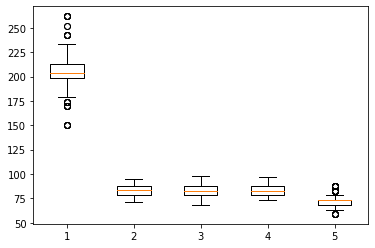

In [6]:
# Basic box plot
import matplotlib.pyplot as plt
%matplotlib inline 


a = plt.boxplot(corr_total)
plt.show()

In [108]:
import numpy as np
Q1 = np.percentile(corr_x_df, 25) 
Q3 = np.percentile(corr_x_df, 75) 
IQR = Q3 - Q1 
outlier_step = 1.5 * IQR

outlier_step

88.5

In [109]:
c_Y = (corr_x_df < Q1 - outlier_step) | (corr_x_df > Q3 + outlier_step)
c_Y = c_Y.any(axis=1)
search_df = corr_x_df[c_Y]
print(search_df)

     c_X
34   359
36   349
63   340
64   349
67   340
486   67
613   77
614   87
643   97
644   87
645   87
647   97


In [57]:
corr_total[corr_total["res_Y"]==0]

,X,cen_Y,res_Y,les_Y,nn_Y,cs_X


In [10]:
corr_modi_df = corr_total[corr_total["res_Y"]!=0]

In [4]:
corr_ratio = corr_df["c_Y"] / corr_df["c_X"]

In [6]:
corr_ratio_df = pd.DataFrame(corr_ratio, columns=["c_ratio"]); corr_ratio_df

,c_ratio
0,3.833333
1,4.400000
2,3.500000
3,2.266667
4,2.266667
...,...
1737,3.000000
1738,2.400000
1739,2.400000
1740,2.466667


In [11]:
corr_total = corr_total.dropna()

In [12]:
corr_modi_df = corr_total

In [13]:
c_labels = ["0" for i in range(len(corr_modi_df))]
c_labels_df = pd.DataFrame(c_labels, columns=["c_labels"]); c_labels_df

,c_labels
0,0
1,0
2,0
3,0
4,0
...,...
632,0
633,0
634,0
635,0


In [14]:
# corr_data = corr_ratio_df.join(c_labels_df, how="right"); corr_data.head()
corr_modi_df = corr_modi_df.join(c_labels_df, how="right"); 

In [63]:
corr_modi_df = corr_modi_df.drop(["labels"], axis=1)

In [15]:
corr_modi_df

,SX,EX,CEN,RES,LES,NN,c_labels
0,213,208,89,92,87,78,0
1,213,208,89,92,87,78,0
2,213,228,85,88,83,73,0
3,213,218,83,83,83,68,0
4,213,218,83,83,83,68,0
...,...,...,...,...,...,...,...
632,213,218,81,78,83,68,0
633,213,218,81,78,83,68,0
634,213,218,81,78,83,68,0
635,213,218,83,83,83,68,0


In [16]:
forw_csv = pd.read_csv("forw_0828.csv") 
forw_df = pd.DataFrame(forw_csv).drop(['Unnamed: 0'], axis=1)

In [17]:
forw_shol_csv = pd.read_csv("f_s_0828.csv")
forw_shol_df = pd.DataFrame(forw_shol_csv).drop(['Unnamed: 0'], axis=1)

In [18]:
forw_shol_df.columns = ["fs_X"]

In [19]:
forw_df = forw_shol_df.join(forw_df, how="right")

In [20]:
forw_df.columns = ['SX','EX','CEN','RES','LES','NN']

In [15]:
forw_df.to_csv("total_forw_210828.csv", encoding="utf-8")

In [21]:
forw_total = forw_df.copy()

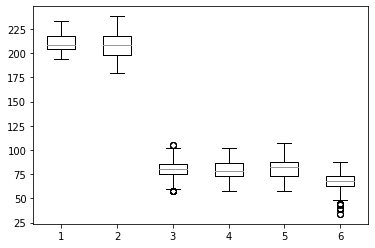

In [22]:
# Basic box plot
import matplotlib.pyplot as plt
%matplotlib inline 


b = plt.boxplot(forw_total)
plt.show()

In [17]:
forw_total.columns = ['X','cen_Y','res_Y','les_Y','nn_Y']

In [89]:
Q1_2 = np.percentile(forw_x_df , 25) 
Q3_2 = np.percentile(forw_x_df , 75) 
IQR_2 = Q3_2 - Q1_2 
outlier_step_2 = 1.5 * IQR_2

outlier_step_2

67.5

In [92]:
f_Y = (forw_x_df < Q1_2 - outlier_step_2) | (forw_x_df > Q3_2 + outlier_step_2)
f_Y = f_Y.any(axis=1)
searchf_df = forw_x_df[f_Y]
print(searchf_df)

     f_X
14    57
16    57
39   321
40   321
42    97
43    57
44    97
46   116
110  106
569  379
571  379
595  116
596  116
598  340
599  379
600  340
601  321
665  330


In [19]:
forw_modi_df = forw_total[forw_total["res_Y"] > 0]

In [20]:
forw_modi_df = forw_modi_df[forw_modi_df["les_Y"] > 0]

In [13]:
forw_ratio = forw_df["f_Y"] / forw_df["f_X"]

In [14]:
forw_ratio_df = pd.DataFrame(forw_ratio, columns=["f_ratio"]); forw_ratio_df.describe()

,f_ratio
count,1677.000000
mean,2.298496
std,0.646880
min,0.112676
25%,1.866667
50%,2.266667
75%,2.635294
max,8.000000


In [23]:
forw_modi_df = forw_total

In [24]:
f_labels = ["1" for i in range(len(forw_modi_df))]
f_labels_df = pd.DataFrame(f_labels, columns=["f_labels"]); f_labels_df

,f_labels
0,1
1,1
2,1
3,1
4,1
...,...
632,1
633,1
634,1
635,1


In [25]:
# forw_data = forw_ratio_df.join(f_labels_df, how="right")
forw_modi_df = forw_modi_df.join(f_labels_df, how="right"); forw_modi_df.head()

,SX,EX,CEN,RES,LES,NN,f_labels
0,203,203,73,68,78,63,1
1,203,203,76,73,78,63,1
2,213,203,78,78,78,68,1
3,218,233,68,68,68,54,1
4,218,233,68,68,68,54,1


In [71]:
corr_modi_df.columns = ["SX_data", "EX_data", "ES_cen", "LES", "RES", "NN", "labels"]
forw_modi_df.columns = ["SX_data", "EX_data", "ES_cen", "LES", "RES", "NN", "labels"]

In [72]:
total_data = pd.concat([corr_modi_df, forw_modi_df])

In [74]:
total_data.to_csv("Concat_0828.csv", encoding="utf-8")

In [4]:
total_csv = pd.read_csv("Concat_0828.csv")
total_data = pd.DataFrame(total_csv).drop(["Unnamed: 0"], axis=1)

In [5]:
total_data.head()

,SX_data,EX_data,ES_cen,LES,RES,NN,labels
0,213,208,89,92,87,78,0
1,213,208,89,92,87,78,0
2,213,228,85,88,83,73,0
3,213,218,83,83,83,68,0
4,213,218,83,83,83,68,0


In [6]:
data_shuffled = total_data.sample(frac=1)  # row 전체 shuffle

data_shuffled = total_data.sample(frac=1).reset_index(drop=True)  # shuffling하고 index reset

In [7]:
data_shuffled = data_shuffled.dropna()

In [8]:
data_shuffled

,SX_data,EX_data,ES_cen,LES,RES,NN,labels
0,213,208,88,88,88,73,0
1,198,203,75,78,73,63,1
2,208,194,78,78,78,63,1
3,208,208,78,78,78,63,0
4,208,199,78,78,78,63,1
...,...,...,...,...,...,...,...
1269,218,198,82,82,82,68,1
1270,203,199,82,82,82,68,0
1271,213,213,83,83,83,73,0
1272,208,208,92,92,92,82,1


In [9]:
pose_data = data_shuffled[["SX_data", "EX_data", "ES_cen", "LES", "RES", "NN"]]

# encoder = LabelEncoder()
# encoder.fit(data_shuffled["labels"])
# data_shuffled["labels"] = encoder.transform(data_shuffled["labels"])

pose_label = data_shuffled["labels"]

In [10]:
train_data, test_data , train_label, test_label  =  train_test_split(pose_data, pose_label, test_size=0.2, random_state=1)

# help( train_test_split )

In [11]:
scaler = StandardScaler()
base_model = svm.SVC(kernel='rbf')
pipe = Pipeline([('scaler', scaler), ('base_model', base_model)])

In [12]:
from sklearn.model_selection import GridSearchCV

In [14]:
parameters = {'base_model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
          'base_model__gamma': [0.0001, 0.001, 0.01, 1, 10, 100, 1000]}
# grid search Part
grid = GridSearchCV(estimator=pipe, param_grid=parameters, cv=5, n_jobs=-1)
grid.fit(train_data, train_label)

# grid search 결과 출력
# print(grid)
print(grid.best_score_)
print(grid.best_estimator_)
# print(grid.predict(test_data))
print("학습 결과", grid.score(train_data, train_label))
print("테스트 결과", grid.score(test_data, test_label))

0.9411426639621366
Pipeline(steps=[('scaler', StandardScaler()),
                ('base_model', SVC(C=100, gamma=1))])
학습 결과 0.9872423945044161
테스트 결과 0.9568627450980393


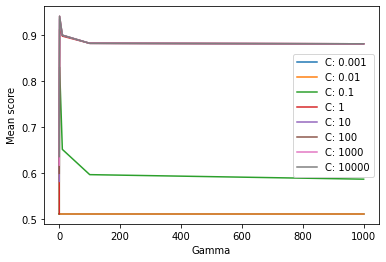

In [17]:
#시각화
scores = grid.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(parameters['base_model__C']), len(parameters['base_model__gamma']))
for ind, i in enumerate(parameters['base_model__C']):
    plt.plot(parameters['base_model__gamma'], scores[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()

In [38]:
# 이상치 제거 전
model = svm.SVC(  )
model.fit(train_data, train_label  ) 
pre = model.predict( test_data )
ac_score = metrics.accuracy_score( test_label, pre ) 
print("SVC 정답률 = " , ac_score)

SVC 정답률 =  0.5882352941176471


In [53]:
# 제거 전
model1 = tree.DecisionTreeClassifier()
model1.fit(train_data, train_label)
pre1 = model1.predict(test_data)
ac_score1 = metrics.accuracy_score(test_label, pre1)
print("의사결정 트리 정답률 = ", ac_score1)

의사결정 트리 정답률 =  0.9764705882352941


In [54]:
# 제거 전
model3 = tree.ExtraTreeClassifier()
model3.fit(train_data, train_label)
pre3 = model3.predict(test_data)
ac_score3 = metrics.accuracy_score(test_label, pre3)
print("엑스트라 트리 회귀 정답률 = ", ac_score3)

엑스트라 트리 회귀 정답률 =  0.9529411764705882


In [55]:
# 제거 전
model4 = ensemble.RandomForestClassifier()
model4.fit(train_data, train_label)
pre4 = model4.predict(test_data)
ac_score4 = metrics.accuracy_score(test_label, pre4)
print("앙상블 랜덤포레스트 정답률 = ", ac_score4)

앙상블 랜덤포레스트 정답률 =  0.9764705882352941


In [56]:
# 제거 전
model5 = ensemble.AdaBoostClassifier()
model5.fit(train_data, train_label)
pre5 = model5.predict(test_data)
ac_score5 = metrics.accuracy_score(test_label, pre5)
print("아다부스트 정답률 = ", ac_score5)

아다부스트 정답률 =  0.807843137254902


In [93]:
# 제거 전
model6 = ensemble.BaggingClassifier()
model6.fit(train_data, train_label)
pre6 = model6.predict(test_data)
ac_score6 = metrics.accuracy_score(test_label, pre6)
print("배깅 정답률 = ", ac_score6)

배깅 정답률 =  0.9803921568627451


In [94]:
# 제거 전
model7 = ensemble.GradientBoostingClassifier()
model7.fit(train_data, train_label)
pre7 = model7.predict(test_data)
ac_score7 = metrics.accuracy_score(test_label, pre7)
print("경사 부스팅 정답률 = ", ac_score7)


경사 부스팅 정답률 =  0.9372549019607843


In [57]:
# 제거 전
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
model8 = ensemble.StackingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)])
model8.fit(train_data, train_label)
pre8 = model8.predict(test_data)
ac_score8 = metrics.accuracy_score(test_label, pre8)
print("스태킹 정답률 = ", ac_score8)

D:\Program Files\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Program Files\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

스태킹 정답률 =  0.9764705882352941


In [58]:
# 제거 전
model9 = ensemble.VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting="hard")
model9.fit(train_data, train_label)
pre9 = model9.predict(test_data)
ac_score9 = metrics.accuracy_score(test_label, pre9)
print("보팅 하드 정답률 = ", ac_score9)

보팅 하드 정답률 =  0.7647058823529411


In [59]:
# 제거 전
model9_1 = ensemble.VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting="soft")
model9_1.fit(train_data, train_label)
pre9_1 = model9_1.predict(test_data)
ac_score9_1 = metrics.accuracy_score(test_label, pre9_1)
print("보팅 소프트 정답률 = ", ac_score9_1)

보팅 소프트 정답률 =  0.8745098039215686


In [60]:
# 제거 전
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
model10 = ensemble.HistGradientBoostingClassifier()
model10.fit(train_data, train_label)
pre10 = model10.predict(test_data)
ac_score10 = metrics.accuracy_score(test_label, pre10)
print("히스트그래디언트부스팅 정답률 = ", ac_score10)

히스트그래디언트부스팅 정답률 =  0.9568627450980393


In [74]:
corr_test_csv = pd.read_csv('test2_corr.csv')

In [75]:
corr_test_df = pd.DataFrame(corr_test_csv)
corr_test_df

,c_X,c_Y
0,114,280
1,114,280
2,85,248
3,114,248
4,86,184
...,...,...
117,85,85
118,85,75
119,85,75
120,86,122


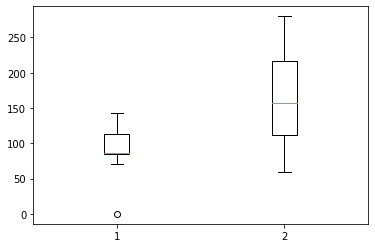

In [48]:
# Basic box plot
import matplotlib.pyplot as plt
%matplotlib inline 


c = plt.boxplot(corr_test_df)
plt.show()

In [49]:
Q1_3 = np.percentile(corr_test_df["c_X"] , 25) 
Q3_3 = np.percentile(corr_test_df["c_X"] , 75) 
IQR_3 = Q3_3 - Q1_3 
outlier_step_3 = 1.5 * IQR_3

outlier_step_3

42.0

In [50]:
c_t_X = (corr_test_df < Q1_3 - outlier_step_3) | (corr_test_df > Q3_3 + outlier_step_3)
c_t_X = c_t_X.any(axis=1)
searcht_df = corr_test_df[c_t_X]
print(searcht_df)

    c_X  c_Y
0   114  280
1   114  280
2    85  248
3   114  248
4    86  184
..  ...  ...
57  114  208
58  114  256
59  114  256
60   99  159
83    0   59

[62 rows x 2 columns]


In [51]:
corr_test_df = corr_test_df.drop(searcht_df.index, axis=0)
print(corr_test_df)

     c_X  c_Y
61    99  154
62    85  128
63    85  133
64    85  133
65    85  133
66   100  144
67    86  144
68    72  118
69    71  107
70    71  123
71    72  129
72    71  112
73    86  113
74    86  112
75    86  118
76    85  139
77    85  150
78    85  144
79    85  133
80    71  123
81    85  123
82    72   64
84    86  123
85    86  128
86    71  123
87    71  112
88    85  133
89    86  138
90    71  144
91    71  133
92    71  101
93    71  101
94    71  101
95    85  106
96    71   96
97    71   96
98    85  106
99    86  112
100   86  138
101   86  133
102   85  117
103   85  112
104   86  112
105   86  112
106   85  107
107   85  102
108   86   86
109   86   91
110   85   86
111   85   75
112   86   80
113   85   91
114   85   96
115   86   95
116   86   85
117   85   85
118   85   75
119   85   75
120   86  122
121   86  122


In [53]:
corr_test_label = ["0" for i in range(len(corr_test_df))]
corr_test_label = pd.DataFrame(corr_test_label, columns=["labels"])

In [54]:
corr_test_data = corr_test_df.join(corr_test_label, how="right")

In [59]:
corr_test_data.columns = ["x_data", "y_data", "labels"]
corr_test_data

,x_data,y_data,labels
0,114,280,0
1,114,280,0
2,85,248,0
3,114,248,0
4,86,184,0
...,...,...,...
117,85,85,0
118,85,75,0
119,85,75,0
120,86,122,0


In [60]:
# from sklearn.preprocessing import LabelEncoder
# # LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
# encoder = LabelEncoder()
# encoder.fit(corr_test_data["labels"])
# corr_test_data["labels"] = encoder.transform(corr_test_data["labels"])
a = corr_test_data.values[: ,:2]

In [61]:
corr_pre = model.predict( a)

In [62]:
corr_score = metrics.accuracy_score( test_label[:122], corr_pre ) 
print("정답률 = " , corr_score)

정답률 =  0.5819672131147541


In [63]:
test_forw_csv = pd.read_csv('test2_forw.csv')

In [64]:
test_forw_df = pd.DataFrame(test_forw_csv)

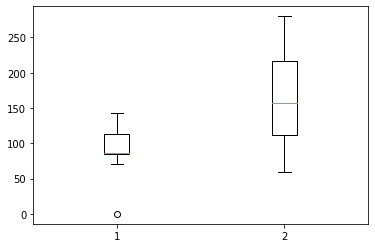

In [65]:
# Basic box plot
import matplotlib.pyplot as plt
%matplotlib inline 


c = plt.boxplot(test_forw_df)
plt.show()

In [66]:
Q1_4 = np.percentile(test_forw_df , 25) 
Q3_4 = np.percentile(test_forw_df , 75) 
IQR_4 = Q3_4 - Q1_4 
outlier_step_4 = 1.5 * IQR_4

outlier_step_4

105.375

In [67]:
c_t_X = (corr_test_df < Q1_3 - outlier_step_3) | (corr_test_df > Q3_3 + outlier_step_3)
c_t_X = c_t_X.any(axis=1)
searcht_df = corr_test_df[c_t_X]
print(searcht_df)

    c_X  c_Y
0   114  280
1   114  280
2    85  248
3   114  248
4    86  184
..  ...  ...
57  114  208
58  114  256
59  114  256
60   99  159
83    0   59

[62 rows x 2 columns]


In [68]:
test_forw_label = ["1" for i in range(len(test_forw_df))]
test_forw_label = pd.DataFrame(test_forw_label, columns=["labels"])

In [69]:
test_forw_data = test_forw_df.join(test_forw_label, how="right")

In [71]:
test_forw_data.columns = ["x_data", "y_data", "labels"]
test_forw_data

,x_data,y_data,labels
0,114,280,1
1,114,280,1
2,85,248,1
3,114,248,1
4,86,184,1
...,...,...,...
117,85,85,1
118,85,75,1
119,85,75,1
120,86,122,1


In [72]:

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
# encoder = LabelEncoder()
# encoder.fit(test_forw_data["labels"])
# test_forw_data["labels"] = encoder.transform(test_forw_data["labels"])
b = test_forw_data.values[: ,:2]

In [73]:
forw_pre = model.predict(b)

In [74]:
forw_score = metrics.accuracy_score( test_label[:122], forw_pre ) 
print("정답률 = " , forw_score)

정답률 =  0.5819672131147541


In [75]:
total_test = pd.concat([corr_test_data,test_forw_data]); total_test

,x_data,y_data,labels
0,114,280,0
1,114,280,0
2,85,248,0
3,114,248,0
4,86,184,0
...,...,...,...
117,85,85,1
118,85,75,1
119,85,75,1
120,86,122,1


In [76]:
total_shuffled = total_test.sample(frac=1)  # row 전체 shuffle

total_shuffled = total_test.sample(frac=1).reset_index(drop=True)  # shuffling하고 index reset

In [77]:
total_shuffled.dropna()

,x_data,y_data,labels
0,71,112,1
1,142,240,0
2,85,96,1
3,86,184,0
4,114,208,1
...,...,...,...
239,85,128,0
240,85,192,0
241,114,248,1
242,71,101,1


In [78]:
# encoder = LabelEncoder()
# encoder.fit(total_shuffled["labels"])
# total_shuffled["labels"] = encoder.transform(total_shuffled["labels"])
c = total_shuffled.values[: ,:2]

In [79]:
total_pre = model.predict(c)

In [80]:
total_score = metrics.accuracy_score( test_label[:244], total_pre ) 
print("정답률 = " , total_score)

정답률 =  0.5491803278688525


In [82]:
total_pre1 = model10.predict(c)
total_score1 = metrics.accuracy_score(test_label[:244], total_pre1)
print("히스트그래디언트부스팅 정답률 = ", total_score1)

히스트그래디언트부스팅 정답률 =  0.5327868852459017


In [83]:
total_pre2 = model9.predict(c)
total_score2 = metrics.accuracy_score(test_label[:244], total_pre2)
print("보팅 하드 정답률 = ", total_score2)

보팅 하드 정답률 =  0.5491803278688525


In [84]:
total_pre3 = model4.predict(c)
total_score3 = metrics.accuracy_score(test_label[:244], total_pre3)
print("앙상블 랜덤포레스트 정답률 = ", total_score3)

앙상블 랜덤포레스트 정답률 =  0.5327868852459017


In [86]:
total_pre4 = model8.predict(c)
total_score4 = metrics.accuracy_score(test_label[:244], total_pre4)
print("스태킹 정답률 = ", total_score4)

스태킹 정답률 =  0.5327868852459017
